In [ ]:
pip install keras

In [ ]:
import tensorflow as tf
import os
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

tpu_address = TF_MASTER

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
print("Number of devices: ", len(tf.config.list_logical_devices('TPU')))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.37.252.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.37.252.42:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Number of devices:  8


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.5 MB/s 


In [ ]:
pip install seaborn

In [ ]:
pip install librosa

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import keras
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.layers import Dense, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

import IPython.display as ipd
from scipy import signal
from tqdm import tqdm

input_duration = 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Ravdess = "/content/drive/MyDrive/kaggle_dataset/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
      
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
train=Ravdess_df
train

,Emotions,Path
0,neutral,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1,neutral,/content/drive/MyDrive/kaggle_dataset/ravdess-...
2,neutral,/content/drive/MyDrive/kaggle_dataset/ravdess-...
3,neutral,/content/drive/MyDrive/kaggle_dataset/ravdess-...
4,calm,/content/drive/MyDrive/kaggle_dataset/ravdess-...
...,...,...
1435,surprise,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1436,surprise,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1437,surprise,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1438,surprise,/content/drive/MyDrive/kaggle_dataset/ravdess-...


In [ ]:
from scipy.io import wavfile
from scipy import signal
import numpy as np

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

/content/drive/MyDrive/kaggle_dataset/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_05/03-01-02-01-01-02-05.wav


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'Seconds')

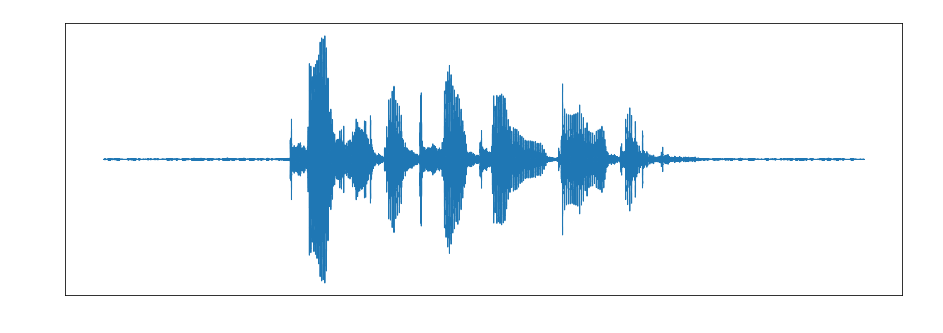

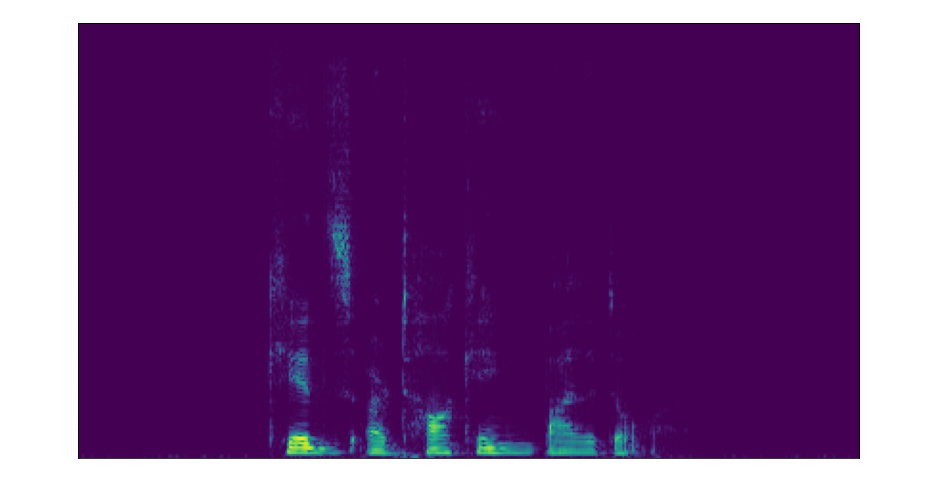

In [ ]:
filename = train['Path'][245]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples
plt.figure(figsize=(15, 5))
plt.title('Raw wave of ' + filename, color='white')
plt.ylabel('Amplitude', color='white')
plt.xlabel('Time', color='white')
plt.tick_params(colors='white')
librosa.display.waveshow(samples, sr=sample_rate)

freqs, times, spectrogram = log_specgram(samples, sample_rate)
plt.figure(figsize=(14, 8))
plt.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2 = plt.axes()
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
plt.tick_params(colors='white')
ax2.set_title('Spectrogram of ' + filename, color='white')
ax2.set_ylabel('Freqs in Hz', color='white')
ax2.set_xlabel('Seconds', color='white')

In [ ]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([-2.22345243e-05, -1.01154255e-05, -1.33532249e-05, ...,
        -2.40894678e-05, -4.02314035e-05, -7.33511333e-05], dtype=float32),
 array([21504, 68096]))

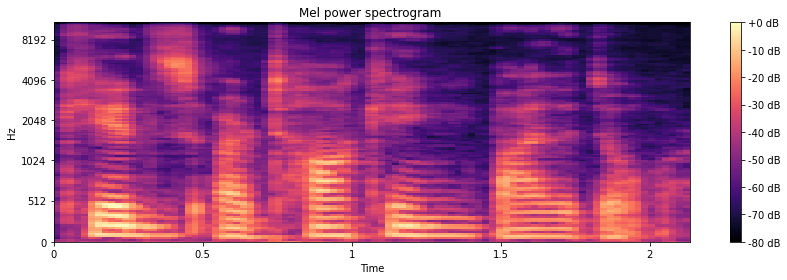

In [ ]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB)
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

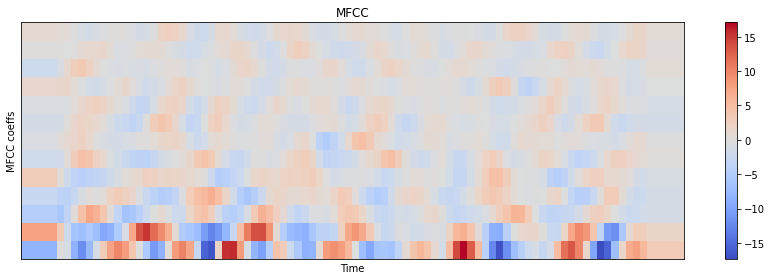

In [ ]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Pad on the first and second deltas
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [ ]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

In [ ]:
count = pd.DataFrame(train.Emotions.value_counts().reset_index())
count.columns = ['emotions', 'count']

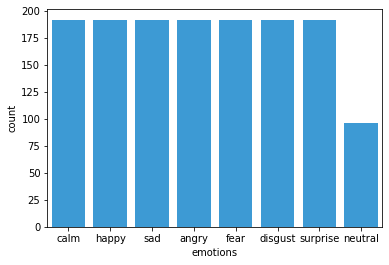

In [ ]:
color_code='#24A0ED'
sns.barplot(x='emotions', y='count', color=color_code, data=count)

In [ ]:
features = pd.Series()
for i in tqdm(range(len(train))):
    X, sample_rate = librosa.load(train.Path[i], res_type='kaiser_fast',duration=3, sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    features.loc[i] = feature

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
100%|██████████| 1440/1440 [07:37<00:00,  3.15it/s]


In [ ]:
features

0       [-65.80097, -65.80097, -65.80097, -65.80097, -...
1       [-61.84994, -62.89504, -63.830635, -60.552586,...
2       [-65.81886, -65.81886, -65.81886, -65.81886, -...
3       [-66.05848, -66.05848, -66.05848, -66.05848, -...
4       [-70.26777, -70.26777, -70.26777, -70.26777, -...
                              ...                        
1435    [-58.98881, -58.98881, -60.665466, -60.689583,...
1436    [-54.67716, -54.67716, -54.67716, -54.67716, -...
1437    [-56.940815, -56.940815, -56.940815, -56.94081...
1438    [-55.25513, -55.25513, -55.18665, -55.34528, -...
1439    [-48.66843, -45.720394, -46.046837, -46.525803...
Length: 1440, dtype: object

In [ ]:
len(features[1439])

259

In [ ]:
features = pd.concat([pd.DataFrame(features.values.tolist()),train['Path']], axis=1)
features

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,Path
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1,-61.849941,-62.895039,-63.830635,-60.552586,-60.821678,-62.073399,-64.889229,-65.389946,-65.389946,-65.389946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/kaggle_dataset/ravdess-...
2,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629539,-64.802628,-65.818863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/kaggle_dataset/ravdess-...
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/kaggle_dataset/ravdess-...
4,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769,/content/drive/MyDrive/kaggle_dataset/ravdess-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-58.988811,-58.988811,-60.665466,-60.689583,-59.735569,-60.501480,-60.420517,-59.816250,-60.189262,-60.110905,...,-58.831997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1436,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,...,-54.677158,-54.677158,-54.156242,-54.677158,-54.677158,-54.115520,-54.271080,-54.677158,-54.333626,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1437,-56.940815,-56.940815,-56.940815,-56.940815,-56.940815,-56.943363,-57.077030,-56.940815,-56.940815,-57.228634,...,-56.940815,-56.940815,-56.940815,-56.940815,-56.940815,-56.923138,-56.938293,-56.917828,-56.660362,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1438,-55.255131,-55.255131,-55.186649,-55.345280,-55.053383,-53.088177,-52.199924,-52.218304,-52.633873,-51.629959,...,-50.436134,-49.073433,-49.137138,-51.701092,-54.797939,-55.255131,-54.609989,-52.193588,-51.588760,/content/drive/MyDrive/kaggle_dataset/ravdess-...


In [ ]:
features[258]

0             NaN
1             NaN
2             NaN
3             NaN
4      -70.267769
          ...    
1435          NaN
1436   -54.333626
1437   -56.660362
1438   -51.588760
1439   -53.829815
Name: 258, Length: 1440, dtype: float64

In [ ]:
features.isnull().sum().sum()

5708

In [ ]:
features_cleaned = features.fillna(0)
features_cleaned

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,Path
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1,-61.849941,-62.895039,-63.830635,-60.552586,-60.821678,-62.073399,-64.889229,-65.389946,-65.389946,-65.389946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,/content/drive/MyDrive/kaggle_dataset/ravdess-...
2,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629539,-64.802628,-65.818863,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,/content/drive/MyDrive/kaggle_dataset/ravdess-...
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,/content/drive/MyDrive/kaggle_dataset/ravdess-...
4,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769,/content/drive/MyDrive/kaggle_dataset/ravdess-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-58.988811,-58.988811,-60.665466,-60.689583,-59.735569,-60.501480,-60.420517,-59.816250,-60.189262,-60.110905,...,-58.831997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1436,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,...,-54.677158,-54.677158,-54.156242,-54.677158,-54.677158,-54.115520,-54.271080,-54.677158,-54.333626,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1437,-56.940815,-56.940815,-56.940815,-56.940815,-56.940815,-56.943363,-57.077030,-56.940815,-56.940815,-57.228634,...,-56.940815,-56.940815,-56.940815,-56.940815,-56.940815,-56.923138,-56.938293,-56.917828,-56.660362,/content/drive/MyDrive/kaggle_dataset/ravdess-...
1438,-55.255131,-55.255131,-55.186649,-55.345280,-55.053383,-53.088177,-52.199924,-52.218304,-52.633873,-51.629959,...,-50.436134,-49.073433,-49.137138,-51.701092,-54.797939,-55.255131,-54.609989,-52.193588,-51.588760,/content/drive/MyDrive/kaggle_dataset/ravdess-...


In [ ]:
labelled_df = pd.concat([train, features_cleaned.drop('Path', axis=1)], axis=1)
labelled_df

,Emotions,Path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,neutral,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,neutral,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-61.849941,-62.895039,-63.830635,-60.552586,-60.821678,-62.073399,-64.889229,-65.389946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,neutral,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,neutral,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,calm,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,surprise,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-58.988811,-58.988811,-60.665466,-60.689583,-59.735569,-60.501480,-60.420517,-59.816250,...,-58.898624,-58.831997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,surprise,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,...,-54.624363,-54.677158,-54.677158,-54.156242,-54.677158,-54.677158,-54.115520,-54.271080,-54.677158,-54.333626
1437,surprise,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-56.940815,-56.940815,-56.940815,-56.940815,-56.940815,-56.943363,-57.077030,-56.940815,...,-56.438938,-56.940815,-56.940815,-56.940815,-56.940815,-56.940815,-56.923138,-56.938293,-56.917828,-56.660362
1438,surprise,/content/drive/MyDrive/kaggle_dataset/ravdess-...,-55.255131,-55.255131,-55.186649,-55.345280,-55.053383,-53.088177,-52.199924,-52.218304,...,-49.756592,-50.436134,-49.073433,-49.137138,-51.701092,-54.797939,-55.255131,-54.609989,-52.193588,-51.588760


In [ ]:
def plot_time_series(data):
  # Plot the Audio Frequency
  fig = plt.figure(figsize=(14, 8))
  plt.title('Raw wave ', color='white')
  plt.ylabel('Amplitude', color='white')
  plt.plot(np.linspace(0, 1, len(data)), data)
  plt.tick_params(colors='white')
  plt.show()


def noise(data):
  # Adding White Noise.
  noise_amp = 0.005*np.random.uniform()*np.amax(data)
  data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
  return data
    
def shift(data):
  # Random Shifting.
  s_range = int(np.random.uniform(low=-5, high = 5)*500)
  return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
  # Streching the Sound.
  data = librosa.effects.time_stretch(data, rate)
  return data
    
def pitch(data, sample_rate):
  # Pitch Tuning.
  bins_per_octave = 12
  pitch_pm = 2
  pitch_change =  pitch_pm * 2*(np.random.uniform())   
  data = librosa.effects.pitch_shift(data.astype('float64'), 
                                    sample_rate, n_steps=pitch_change, 
                                    bins_per_octave=bins_per_octave)
  return data
    
def dyn_change(data):
  # Random Value Change.
  dyn_change = np.random.uniform(low=1.5,high=3)
  return (data * dyn_change)
    
def speedNpitch(data):
  # peed and Pitch Tuning.
  # you can change low and high here
  length_change = np.random.uniform(low=0.8, high = 1)
  speed_fac = 1.0  / length_change
  tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
  minlen = min(data.shape[0], tmp.shape[0])
  data *= 0
  data[0:minlen] = tmp[0:minlen]
  return data

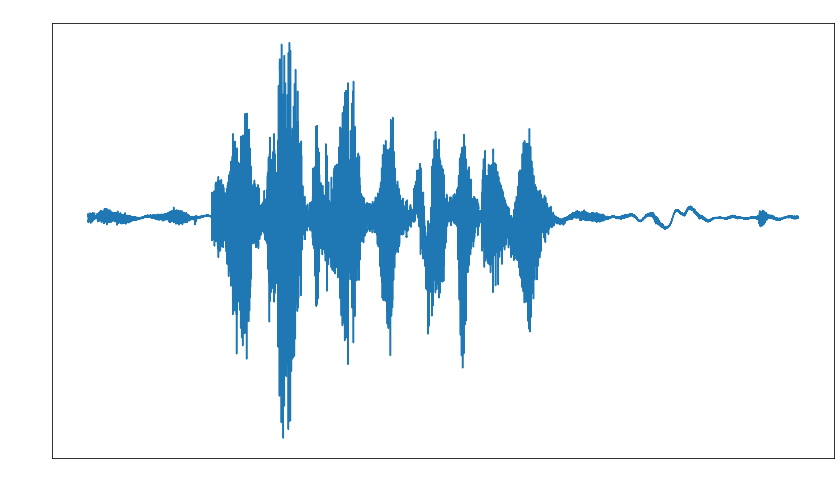

In [ ]:
X, sample_rate = librosa.load(labelled_df.Path[160], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

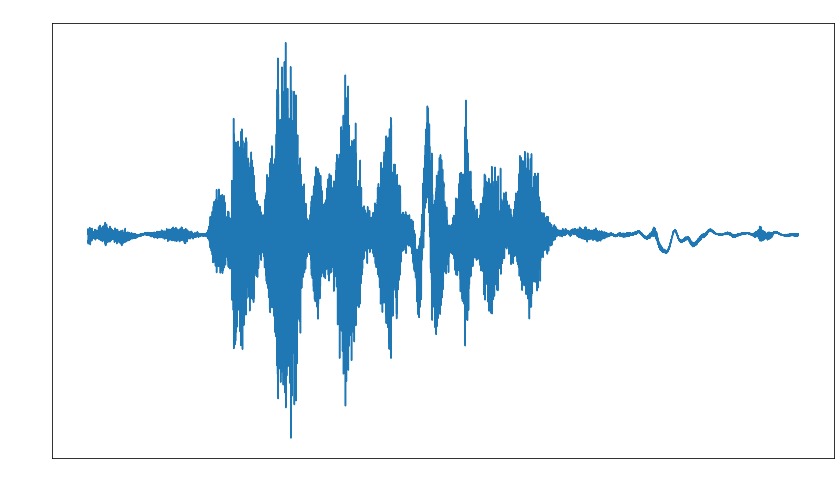

In [ ]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [ ]:
# Augmentation of Noise
syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(labelled_df))):
    X, sample_rate = librosa.load(labelled_df.Path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if labelled_df.Emotions[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, labelled_df.Emotions[i]]

100%|██████████| 1440/1440 [02:31<00:00,  9.54it/s]


In [ ]:
# Augmentation of Pitch

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(labelled_df))):
    X, sample_rate = librosa.load(labelled_df.Path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if labelled_df.Emotions[i]:
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, labelled_df.Emotions[i]]

 15%|█▍        | 210/1440 [01:38<09:36,  2.13it/s]


KeyboardInterrupt: ignored

In [ ]:
len(syn_data1), len(syn_data2) 

(1440, 1440)

In [ ]:
syn_data1

,feature,label
0,"[-56.66654215513729, -55.119209196567105, -56....",neutral
1,"[-49.70569142587861, -50.03676038413824, -51.8...",neutral
2,"[-64.30237177859745, -63.48211892997251, -62.1...",neutral
3,"[-50.409075036465794, -50.69123237781642, -50....",neutral
4,"[-64.43019637529618, -62.41586790822278, -61.6...",calm
...,...,...
1435,"[-43.66482536310087, -43.60087913678438, -45.1...",surprise
1436,"[-48.75474394346299, -48.330980720552674, -50....",surprise
1437,"[-54.977370210226816, -53.91186157542383, -53....",surprise
1438,"[-41.28905479877384, -37.943118949745866, -38....",surprise


In [ ]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [ ]:
df1 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels1 = syn_data1.label
syndf1 = pd.concat([df1,labels1], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

1440

In [ ]:
syndf1

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-56.666542,-55.119209,-56.647771,-58.442265,-57.259465,-55.973563,-57.413587,-54.675247,-54.524981,-54.339101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
1,-49.705691,-50.036760,-51.805039,-52.400879,-52.340320,-53.121337,-55.302337,-54.748307,-53.919115,-49.557100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
2,-64.302372,-63.482119,-62.176897,-63.621129,-63.039062,-60.809620,-60.815540,-60.328479,-58.766418,-61.252240,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3,-50.409075,-50.691232,-50.981604,-49.744454,-48.333974,-50.108838,-50.344234,-50.800731,-52.645291,-52.483118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
4,-64.430196,-62.415868,-61.635064,-62.141806,-61.187147,-60.125668,-61.003432,-63.900300,-63.679166,-62.354770,...,-61.668833,-60.290597,-61.192322,-61.060288,-62.136727,-62.999261,-62.009497,-61.234998,-62.122321,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-43.664825,-43.600879,-45.191159,-44.749795,-44.549535,-45.969430,-45.347201,-42.995286,-43.796810,-46.006539,...,-42.028863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,surprise
1436,-48.754744,-48.330981,-50.113197,-49.428067,-47.252242,-46.141326,-46.815588,-43.896363,-43.038002,-42.852495,...,-47.648082,-47.776458,-46.463749,-45.433963,-45.675099,-46.367910,-47.820364,-47.081327,-45.778521,surprise
1437,-54.977370,-53.911862,-53.507489,-55.064435,-54.073260,-53.826658,-54.029961,-54.014346,-54.912839,-54.456456,...,-55.444862,-55.706025,-55.673312,-54.205376,-52.986092,-53.377543,-53.345469,-52.471511,-52.117898,surprise
1438,-41.289055,-37.943119,-38.682205,-40.273790,-39.574004,-40.353862,-40.144533,-37.727996,-37.396691,-39.072279,...,-37.828490,-36.958621,-37.017119,-36.734916,-39.001086,-39.580941,-38.123157,-38.965224,-41.295316,surprise


In [ ]:
df2 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels2 = syn_data2.label
syndf2 = pd.concat([df2,labels2], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

1440

In [ ]:
syndf2

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-69.712782,-69.712782,-69.712782,-69.712782,-69.712782,-69.712782,-69.712782,-69.712782,-69.712782,-69.712782,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
1,-62.314283,-63.547671,-65.755702,-64.247481,-64.094661,-65.036664,-67.703953,-68.132541,-68.132541,-68.132541,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
2,-68.159574,-68.159574,-68.159574,-68.159574,-67.961057,-68.159574,-68.159574,-67.165889,-67.836551,-68.159574,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3,-66.139912,-66.139912,-66.139912,-66.139912,-66.139912,-66.139912,-66.139912,-66.139912,-66.139912,-66.139912,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
4,-72.399911,-72.399911,-72.399911,-72.399911,-72.399911,-72.399911,-72.399911,-72.399911,-72.399911,-72.399911,...,-72.399911,-72.399911,-72.150187,-71.708216,-72.399911,-72.399911,-71.723359,-72.009598,-72.399911,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-60.993701,-61.900081,-62.366646,-62.127275,-62.380918,-62.120920,-61.696588,-62.207801,-62.388304,-62.268168,...,-60.998134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,surprise
1436,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,...,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,surprise
1437,-59.638097,-59.638097,-59.638097,-59.638097,-59.638097,-59.638097,-59.735226,-59.638097,-59.716712,-60.056909,...,-59.547320,-59.638097,-59.638097,-59.638097,-59.638097,-59.638097,-59.629174,-59.567778,-59.680460,surprise
1438,-56.390549,-56.390549,-56.340711,-56.069300,-55.397309,-54.855229,-54.589528,-54.194313,-53.752403,-52.747867,...,-53.643531,-53.233467,-53.451698,-53.882423,-54.598091,-55.772553,-56.203408,-56.265208,-56.125823,surprise


In [ ]:
# Combining the Augmented data with original
combined_df = pd.concat([labelled_df.rename(columns={'Emotions': 'label'}), syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0).drop('Path', axis=1)
combined_df

,label,0,1,2,3,4,5,6,7,8,...,249,250,251,252,253,254,255,256,257,258
0,neutral,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,neutral,-61.849941,-62.895039,-63.830635,-60.552586,-60.821678,-62.073399,-64.889229,-65.389946,-65.389946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,neutral,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629539,-64.802628,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,neutral,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,calm,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,surprise,-60.993701,-61.900081,-62.366646,-62.127275,-62.380918,-62.120920,-61.696588,-62.207801,-62.388304,...,-60.998134,-60.998134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4316,surprise,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,...,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117,-55.636117
4317,surprise,-59.638097,-59.638097,-59.638097,-59.638097,-59.638097,-59.638097,-59.735226,-59.638097,-59.716712,...,-58.706198,-59.547320,-59.638097,-59.638097,-59.638097,-59.638097,-59.638097,-59.629174,-59.567778,-59.680460
4318,surprise,-56.390549,-56.390549,-56.340711,-56.069300,-55.397309,-54.855229,-54.589528,-54.194313,-53.752403,...,-54.324839,-53.643531,-53.233467,-53.451698,-53.882423,-54.598091,-55.772553,-56.203408,-56.265208,-56.125823


In [ ]:
combined_df.groupby('label').count()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
label,,,,,,,,,,,,,,,,,,,,,
angry,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
calm,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
disgust,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
fear,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
happy,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
neutral,288,288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
sad,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
surprise,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576


In [ ]:
#  Stratified Shuffle Split
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, valid_index in xxx.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

In [ ]:
y_train.value_counts()

calm        461
angry       461
disgust     461
sad         461
happy       461
surprise    461
fear        460
neutral     230
Name: label, dtype: int64

In [ ]:
y_train

3482    neutral
1992       calm
3455      angry
1007    disgust
2005        sad
         ...   
4279      happy
200         sad
2552      angry
2373      angry
3799      happy
Name: label, Length: 3456, dtype: object

In [ ]:
y_valid.value_counts()

fear        116
sad         115
calm        115
surprise    115
disgust     115
happy       115
angry       115
neutral      58
Name: label, dtype: int64

In [ ]:
X_train.isna().sum().sum()

0

In [ ]:
print(X_train)
print('----------------------------------')
print(X_train[0])
X_train[0].shape

[[-51.05215981 -53.61042099 -56.42847664 ...   0.           0.
    0.        ]
 [-55.23755398 -53.027685   -53.13747242 ... -50.466797   -49.6904782
  -50.4433229 ]
 [-44.70647508 -44.70647508 -44.70647508 ... -45.206849   -45.28945069
  -45.25237822]
 ...
 [-31.88163502 -33.05559357 -36.37195489 ... -33.59739355 -35.36157067
  -35.34701813]
 [-36.52010839 -36.82659558 -38.40980567 ... -37.09718682 -36.34631402
  -38.43978562]
 [-55.09922076 -55.09922076 -55.09922076 ... -55.09922076 -55.09922076
  -55.09922076]]
----------------------------------
[-51.05215981 -53.61042099 -56.42847664 -55.90588473 -55.13784182
 -55.61671941 -55.75518321 -55.19660134 -53.39028734 -52.74451178
 -52.82542868 -54.04462909 -54.08746421 -51.3481053  -52.63398572
 -55.0032614  -57.82810532 -60.50724569 -60.80416456 -61.21266127
 -59.89898303 -59.28814249 -63.41920193 -60.8415496  -59.74001249
 -62.30780002 -63.97758165 -65.01185413 -64.85384669 -66.46986846
 -68.12502312 -64.88878315 -62.57941894 -61.001926

(259,)

In [ ]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_valid = np_utils.to_categorical(lb.fit_transform(y_valid))

In [ ]:
y_train.shape

(3456, 8)

In [ ]:
X_train.shape

(3456, 259)

In [ ]:
y_train.shape

(3456, 8)

In [ ]:
x_traincnn = np.expand_dims(X_train.astype('float32'), axis=2)
x_validcnn = np.expand_dims(X_valid.astype('float32'), axis=2)

In [ ]:
x_traincnn.shape, x_validcnn.shape

((3456, 259, 1), (864, 259, 1))

In [ ]:
# Keras util functions
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return float(0)

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr


In [ ]:
def create_model():
  return tf.keras.Sequential([
tf.keras.layers.Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)),
tf.keras.layers.Activation('relu'),
tf.keras.layers.Conv1D(256, 8, padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.MaxPooling1D(pool_size=(8)),
tf.keras.layers.Conv1D(128, 8, padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv1D(128, 8, padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.MaxPooling1D(pool_size=(8)),
tf.keras.layers.Conv1D(64, 8, padding='same'),
tf.keras.layers.Activation('relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv1D(64, 8, padding='same'),
tf.keras.layers.Activation('relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(32),
tf.keras.layers.Dense(8,activation='softmax'),
  ])

with strategy.scope():
  model = create_model()
  opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])
  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 259, 256)          2304      
                                                                 
 activation (Activation)     (None, 259, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 259, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 259, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 259, 256)          0         
                                                                 
 dropout (Dropout)           (None, 259, 256)          0         
                                                        

In [ ]:
# Model Training
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)

mcp_save = ModelCheckpoint('model/aug_noiseNshift.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=350,
                     validation_data=(x_validcnn, y_valid), callbacks=[mcp_save, lr_reduce])

Epoch 1/350
216/216 [==============================] - 12s 28ms/step - loss: 1.9926 - accuracy: 0.2225 - fscore: 0.0089 - val_loss: 1.8708 - val_accuracy: 0.2731 - val_fscore: 0.0000e+00 - lr: 0.0010
Epoch 2/350
216/216 [==============================] - 4s 20ms/step - loss: 1.9033 - accuracy: 0.2422 - fscore: 0.0306 - val_loss: 2.0476 - val_accuracy: 0.1887 - val_fscore: 0.0000e+00 - lr: 0.0010
Epoch 3/350
216/216 [==============================] - 5s 21ms/step - loss: 1.8686 - accuracy: 0.2636 - fscore: 0.0506 - val_loss: 1.8444 - val_accuracy: 0.2940 - val_fscore: 0.0216 - lr: 0.0010
Epoch 4/350
216/216 [==============================] - 4s 20ms/step - loss: 1.7980 - accuracy: 0.2879 - fscore: 0.0709 - val_loss: 2.4125 - val_accuracy: 0.1562 - val_fscore: 0.0864 - lr: 0.0010
Epoch 5/350
216/216 [==============================] - 4s 20ms/step - loss: 1.7706 - accuracy: 0.3079 - fscore: 0.0803 - val_loss: 1.8841 - val_accuracy: 0.2743 - val_fscore: 0.0185 - lr: 0.0010
Epoch 6/350
216/

27/27 [==============================] - 2s 25ms/step - loss: 0.2570 - accuracy: 0.9178 - fscore: 0.9116
Accuracy of our model on test data :  91.78240895271301 %


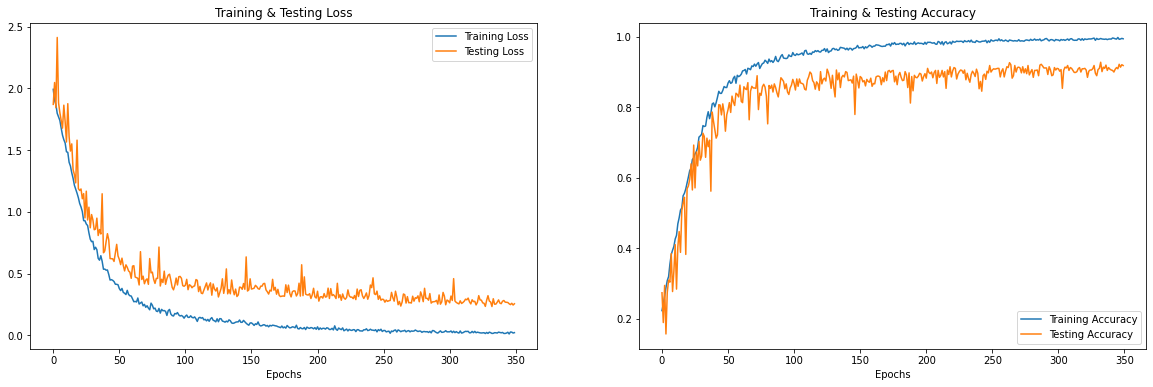

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_validcnn,y_valid)[1]*100 , "%")

epochs = [i for i in range(350)]
fig , ax = plt.subplots(1,2)
train_acc = cnnhistory.history['accuracy']
train_loss = cnnhistory.history['loss']
test_acc = cnnhistory.history['val_accuracy']
test_loss = cnnhistory.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

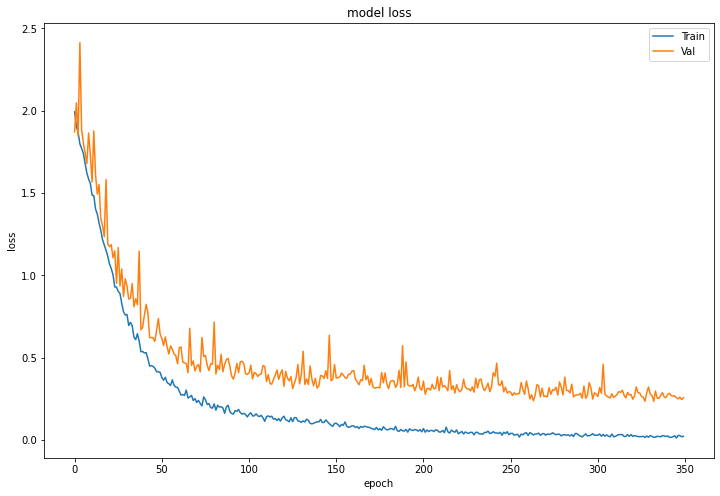

In [ ]:
# Plotting the Train Valid Loss Graph

plt.figure(figsize=(12, 8))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# Saving the model.json
import json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:

opt=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)

In [ ]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model/aug_noiseNshift.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_validcnn, y_valid, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 92.13%


In [ ]:
y_valid_pred = loaded_model.predict(x_validcnn, 
                          batch_size=16, 
                          verbose=1)

54/54 [==============================] - 1s 11ms/step


In [ ]:
y_valid_pred

array([[1.1561931e-06, 1.1394225e-04, 1.6251835e-05, ..., 1.5506790e-04,
        9.9966717e-01, 9.3973595e-06],
       [8.3772531e-05, 9.9889910e-01, 1.1649536e-04, ..., 3.2289626e-04,
        1.9345152e-04, 4.4491891e-05],
       [2.3385635e-02, 1.0572857e-03, 1.3445477e-03, ..., 7.4758842e-03,
        7.4663404e-03, 2.4665867e-01],
       ...,
       [4.1744753e-04, 9.8769605e-01, 5.2194484e-04, ..., 4.2570815e-03,
        3.6665541e-03, 4.4242755e-04],
       [2.2809565e-02, 2.0769578e-03, 7.1596908e-03, ..., 5.1451474e-03,
        1.6534191e-01, 3.6905238e-01],
       [3.5560923e-05, 2.6954867e-05, 9.9987066e-01, ..., 1.3182925e-07,
        1.1293803e-06, 1.5149950e-06]], dtype=float32)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_valid_pred.flatten()
df['Actual Labels'] = y_valid.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,0.000001,0.0
1,0.000114,0.0
2,0.000016,0.0
3,0.000034,0.0
4,0.000003,0.0
5,0.000155,0.0
6,0.999667,1.0
7,0.000009,0.0
8,0.000084,0.0
9,0.998899,1.0


In [ ]:
from sklearn.metrics import accuracy_score
y_true = np.argmax(y_valid, axis=1)
y_pred = np.argmax(y_valid_pred, axis=1)
accuracy_score(y_true, y_pred)*100


92.12962962962963

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

91.98900155157736

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[112,   1,   1,   0,   1,   0,   0,   0],
       [  0, 103,   1,   0,   1,   3,   7,   0],
       [  6,   1, 103,   2,   2,   1,   0,   0],
       [  2,   0,   1, 110,   2,   1,   0,   0],
       [  2,   0,   0,   5, 104,   2,   0,   2],
       [  0,   0,   0,   2,   1,  55,   0,   0],
       [  1,   0,   0,   1,   2,   3, 107,   1],
       [  4,   0,   0,   4,   2,   0,   3, 102]])

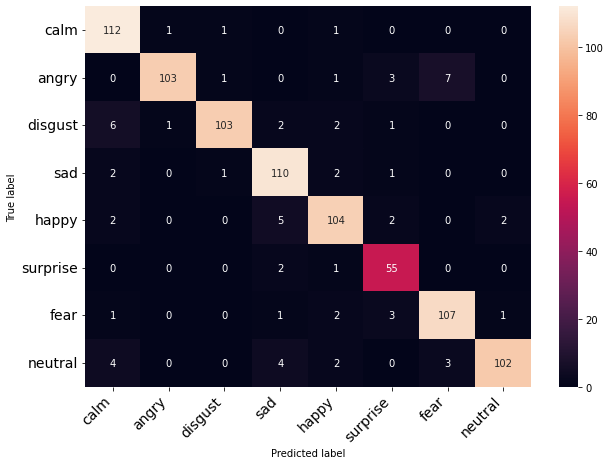

In [ ]:
class_names = ['calm','angry','disgust','sad','happy','surprise','fear','neutral']

print_confusion_matrix(c, class_names)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
print(metrics.classification_report(np.argmax(y_valid, axis=1), np.argmax(y_valid_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       115
           1       0.98      0.90      0.94       115
           2       0.97      0.90      0.93       115
           3       0.89      0.95      0.92       116
           4       0.90      0.90      0.90       115
           5       0.85      0.95      0.89        58
           6       0.91      0.93      0.92       115
           7       0.97      0.89      0.93       115

    accuracy                           0.92       864
   macro avg       0.92      0.92      0.92       864
weighted avg       0.92      0.92      0.92       864

